In [34]:
import os
import warnings  # 解除警告

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder  # IF会自动遍历指定目录下的所有子目录，并将每个子目录中的图像文件视为同一类别的数据
from PIL import Image  # pip install Pillow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 加载已有数据集MNIST

In [35]:
data_path = r'D:\code\data'

# 设置随机种子
torch.manual_seed(42)
# 定义数据转换方法
transform = transforms.Compose([
    transforms.ToTensor(),  # 将数据转为张量
])
# 加载训练数据  实例化训练数据加载器
train_dataset = datasets.MNIST(root=data_path, train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
# 加载测试数据  实例化测试数据加载器
test_dataset = datasets.MNIST(root=data_path, train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

# 加载自己的数据集：文件夹子文件

In [36]:
data_path = r'C:\Users\16654\Desktop\train\dataset2'

# 定义数据转换方法
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # 调整图像大小
    transforms.ToTensor(),  #将数据转换为张量
])
# 创建自己的图像数据集
dataset = ImageFolder(data_path, transform=transform)
# 可查看数据集属性：len(dataset)、dataset.classes、dataset.class_to_idx

In [37]:
len(dataset)

45352

In [38]:
def plot_from_dataset(dataset, nrows=5, ncols=5, shuffle=True, cmap=None):
    # 数据加载器
    dataloader = DataLoader(dataset, batch_size=(nrows * ncols), shuffle=shuffle)
    # 取出一组数据
    images, labels = next(iter(dataloader))
    images = np.transpose(images, (0, 2, 3, 1))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 8))
    # 遍历每个子图 绘制图像并添加子图标题
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap=cmap)
        ax.axis('off')  # 隐藏坐标轴
        if hasattr(dataset, 'classes'):
            ax.set_title(dataset.classes[labels[i]], fontsize=12)
        else:
            ax.set_title(labels[i], fontsize=12)
    plt.show()

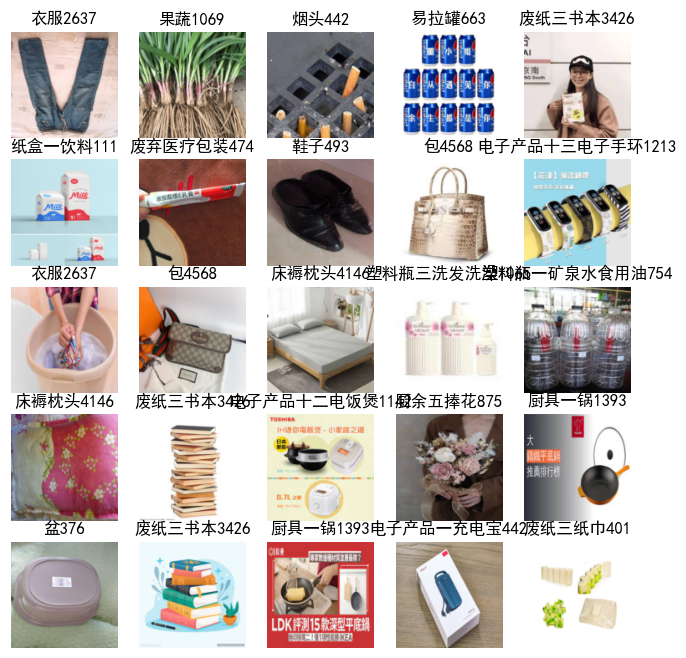

In [39]:
plot_from_dataset(dataset)

# 加载自己的数据集：文件命名(封装类)

In [61]:
class Garbages(Dataset):
    def __init__(self, data_dir, transform=None):
        self.image_paths = []
        self.labels = []
        self.transform = transform
        # 遍历数据集目录 得到图像文件的路径和标签
        for foldername in sorted(os.listdir(data_dir)):
            label = foldername
            self.labels.append(label)
            folder_path = os.path.join(data_dir, foldername)
            for filename in sorted(os.listdir(folder_path)):
                image_path = os.path.join(folder_path, filename)
                self.image_paths.append(image_path)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        # 加载图像数据和标签
        image = Image.open(self.image_paths[idx]).convert('RGB')
        label = self.labels[idx]
        # 对图像数据进行转换
        if self.transform:
            image = self.transform(image)
        # 将标签数据转换为torch张量
        # label = torch.tensor(label, dtype=torch.long)
        return image, label

In [62]:
data_dir = r'C:\Users\16654\Desktop\train\dataset2'
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

dataset = Garbages(data_dir, transform)
dataset.labels[1]

'剩菜剩饭1165'

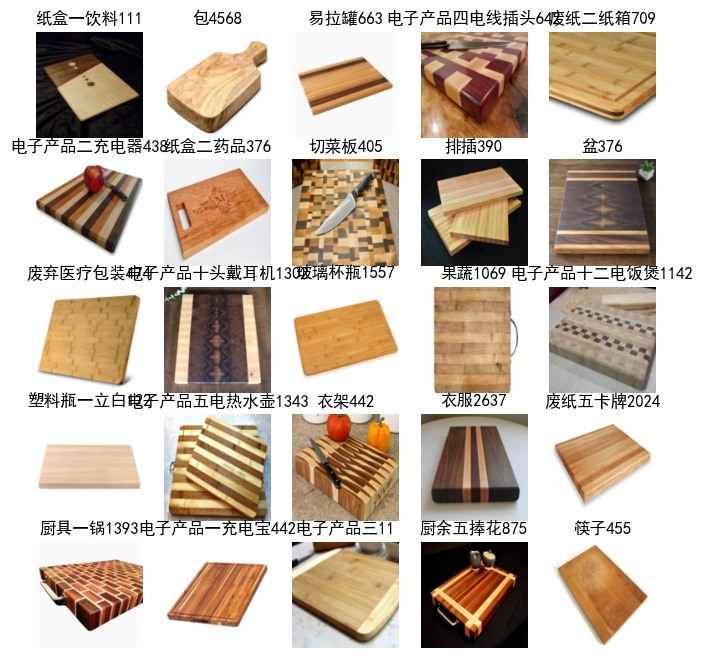

In [63]:
plot_from_dataset(dataset)